# Data adjustment + enrichment

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./irius_threats_microservice.csv")

df.head()

,Component,Use Case,Source,Threat,Risk response,Inherent Risk,Current Risk,Countermeasure Progress,Weakness Tests,Countermeasure Tests,Projected Risk,Owner
0,API gateway,Authentication and Authorization,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
1,API gateway,Logging and Monitoring,Created by rules engine,Exploitation of insufficient logging and monit...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
2,Catalog DB,Access service,Created by rules engine,Attackers gain access to unauthorised data by ...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,Critical,Critical,0%,Not tested,Not tested,Critical,Tomasz Skrond
3,Catalog DB,Access service,Created by rules engine,Authentication Bypass,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond
4,Catalog DB,Access service,Created by rules engine,Data leakage or disclosure to unauthorized par...,Planned Mitigation: 0%. Mitigated: 0%. Unmitig...,High,High,0%,Not tested,Not tested,High,Tomasz Skrond


### Add threats abbrieviations for cleaner plotting + map each threat to STRIDE nomenclature

#### Deleted irrelevant rows

Mobile Device Client and Web Client are not a part of application, they represent Web Browsers for each platform.

In [182]:
threats_gpt = [
    'Authentication Bypass', 'Insufficient Logging', 'Unauthorized Data Access', 'Authentication Bypass',
    'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation',
    'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging',
    'Network Compromise', 'SQL Injection', 'Unauthorized Data Access', 'Authentication Bypass', 'Data Leakage',
    'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering',
    'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise',
    'SQL Injection', 'Cross-Site Scripting', 'Security Misconfiguration', 'Third-Party Access', 'Client-Side Secret',
    'Deprecated Technology', 'Cross-Site Scripting', 'Man-in-the-Middle Attack', 'Privilege Abuse', 'ClickJacking',
    'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering', 'Code Injection',
    'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'Unauthorized Data Access',
    'Authentication Bypass', 'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability',
    'Excessive Allocation', 'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access',
    'Insufficient Logging', 'Network Compromise', 'SQL Injection', 'Malicious Push Notifications', 'Man-in-the-Middle Attack',
    'SQL Injection', 'Environment Control', 'Account Configuration Flaw', 'Denial of Service', 'Data Deletion',
    'Command Injection', 'Security Misconfiguration', 'Behavior Modification', 'Unnecessary Privileges',
    'Improper ACL Configuration', 'WebView Data Access', 'Error Handling Flaw', 'Buffer Overflow', 'Cross-Site Scripting',
    'Security Misconfiguration', 'Third-Party Access', 'Client-Side Secret', 'Deprecated Technology', 'Cross-Site Scripting',
    'Man-in-the-Middle Attack', 'Privilege Abuse', 'ClickJacking', 'Unauthorized Data Access', 'Authentication Bypass',
    'Data Leakage', 'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation',
    'Image Tampering', 'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging',
    'Network Compromise', 'SQL Injection', 'Unauthorized Data Access', 'Authentication Bypass', 'Data Leakage',
    'App Data Manipulation', 'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering',
    'Code Injection', 'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'SQL Injection',
    'Weak Security Config', 'Cloud Vulnerability', 'Excessive Allocation', 'Image Tampering', 'Code Injection',
    'Scalability Attack', 'Container Access', 'Insufficient Logging', 'Network Compromise', 'Cross-Site Scripting',
    'Security Misconfiguration', 'Client-Side Secret', 'Deprecated Technology', 'Man-in-the-Middle Attack'
]

threat_mapping = dict(zip(df["Threat"].unique(), threats_gpt))
df['Threat abbv'] = threats_gpt
# df['Threat'] = df['Threat'].map(threat_mapping)

# df.to_csv("output_to_check.csv",index=True)

threats_to_stride = {
    'Authentication Bypass': 'Elevation of Privilege',
    'Exploitation of insufficient logging and monitoring': 'Repudiation',
    'Attackers gain access to unauthorised data by exploiting vulnerabilities in the service': 'Information Disclosure',
    'Data leakage or disclosure to unauthorized parties': 'Information Disclosure',
    'Attackers who compromise the application or application server could directly access and modify the data store': 'Tampering',
    'Sensitive data is exposed through weak security configurations': 'Information Disclosure',
    'Attackers use known cloud vulnerabilities to access unauthorized data': 'Information Disclosure',
    'Excessive Allocation': 'Denial of Service',
    'Attackers compromise images by modifying their content': 'Tampering',
    'Attackers gain access to the sensitive data through injecting code in the repositories': 'Information Disclosure',
    'Availability is compromised through attacks against scalability configuration': 'Denial of Service',
    'Sensitive data is compromised by unauthorized access to container volumes': 'Information Disclosure',
    'Sensitive data is compromised through network access': 'Information Disclosure',
    'Attackers gain unauthorised access to data and/or systems through SQL Injection attacks': 'Elevation of Privilege',
    'An adversary embeds malicious scripts in content that will be served to web browsers': 'Elevation of Privilege',
    'Application contains security vulnerabilities not identified during the development process': 'Information Disclosure',
    'Attackers gain unauthorised access to data by compromising third party web resources': 'Information Disclosure',
    'Attackers gain unauthorised access to data or services by accessing a client side secret': 'Information Disclosure',
    'Attackers gain unauthorised access to the application by the use of deprecated client-side technologies': 'Elevation of Privilege',
    'Attackers could gain access to sensitive data through a man in the middle attack': 'Information Disclosure',
    'Privilege Abuse': 'Elevation of Privilege',
    'Attackers cause users to peform arbitrary clicks on the site through ClickJacking attacks': 'Tampering',
    'An attacker could send malicious push notifications, leading to unauthorized actions, data breaches, or phishing attacks': 'Information Disclosure',
    'Attackers gain unauthorized access to the control of the environment': 'Elevation of Privilege',
    'Attackers gain unauthorized access to the user account due to the lack of configuration of the account': 'Elevation of Privilege',
    'Attackers perform a Denial of Service (DoS)': 'Denial of Service',
    'Data is intentionally or accidentally deleted': 'Tampering',
    # 'Attackers cause users to peform arbitrary clicks on the site through ClickJacking attacks': "Tampering",
    'An attacker attempts to invoke all common switches and options to discover weaknesses': 'Information Disclosure',
    'Attacker gains access to sensitive data by modifying the application\'s expected behavior': 'Tampering',
    'Users lose trust in the application because it requests unnecessary privileges': 'Elevation of Privilege',
    'Accessing Functionality Not Properly Constrained by ACLs': 'Elevation of Privilege',
    'Attackers gain access to the data through the WebView functionality': 'Information Disclosure',
    'Attackers gain unauthorised access to the application through an error handling flaw': 'Elevation of Privilege',
    'Attackers gain unauthorised access to the application through buffer overflow flaws': 'Elevation of Privilege'
}

df['STRIDE Category'] = df['Threat'].map(threats_to_stride)

# print(df.to_string())

df_filtered = df[~df['Component'].isin(['Mobile Device Client', 'Web Client'])]
print(len(df_filtered))

df = df_filtered

threats = df["Threat"]
threats_unique = df["Threat"].unique()

components = df["Component"].unique()

critical = df[df["Inherent Risk"] == "Critical"]
high = df[df["Inherent Risk"] == "High"]


# print(components.tolist())
print("Components defined:",len(components))

# print(threats.tolist())
print("Threats found:",len(threats))

print("High risks:",len(high))
print("Critical risks:",len(critical))

115
Components defined: 16
Threats found: 115
High risks: 59
Critical risks: 56


### Podsumowanie 1
Wykryto 115 zagrożeń w 16 komponentach. <br>
59 z zagrożeń było na poziomie "High", 56 na poziomie "Critical".

# Most useful data
Tasks:
1. Link Components with Threats [ x ]
2. Link Components with Inherent Risks [ x ]
3. Link Components with STRIDE Category [ x ]
4. Link Use Cases with Threats [ x ]

In [183]:
useful = df[["Component","Use Case","Threat","Threat abbv","Inherent Risk","STRIDE Category"]]
useful.head()

,Component,Use Case,Threat,Threat abbv,Inherent Risk,STRIDE Category
0,API gateway,Authentication and Authorization,Authentication Bypass,Authentication Bypass,High,Elevation of Privilege
1,API gateway,Logging and Monitoring,Exploitation of insufficient logging and monit...,Insufficient Logging,High,Repudiation
2,Catalog DB,Access service,Attackers gain access to unauthorised data by ...,Unauthorized Data Access,Critical,Information Disclosure
3,Catalog DB,Access service,Authentication Bypass,Authentication Bypass,High,Elevation of Privilege
4,Catalog DB,Access service,Data leakage or disclosure to unauthorized par...,Data Leakage,High,Information Disclosure


# Threats + risk per component

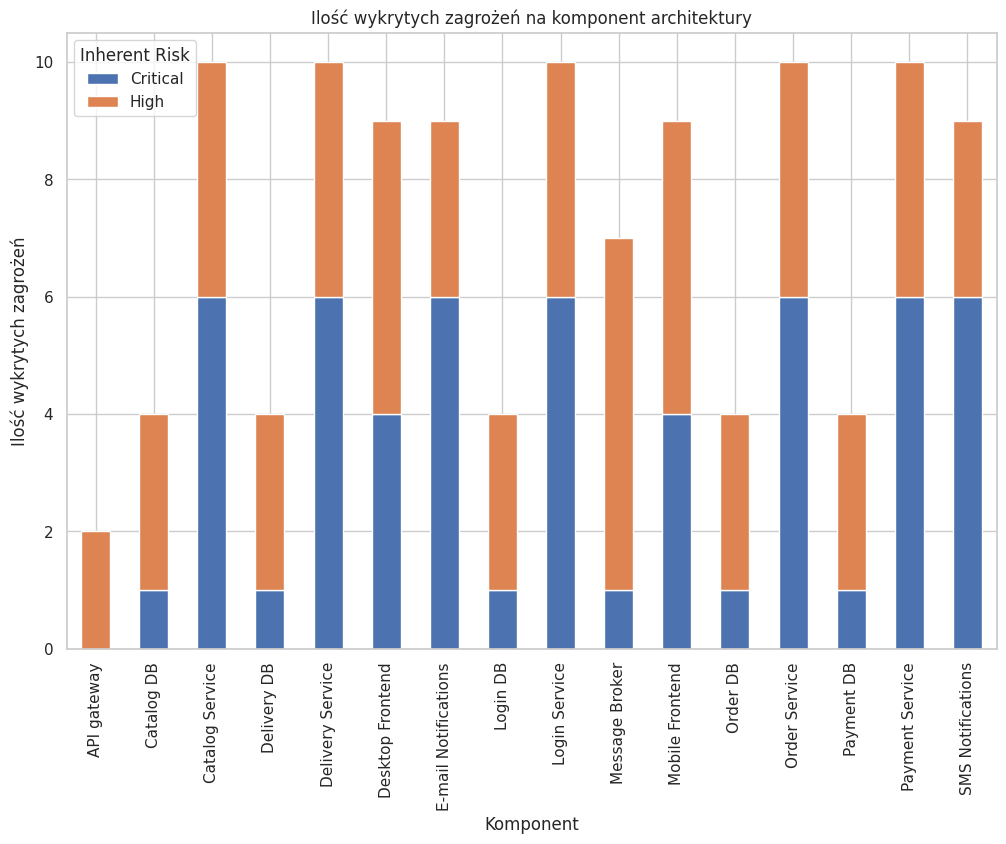

Inherent Risk         Critical  High  Threat Sum
Component                                       
API gateway                  0     2           2
Catalog DB                   1     3           4
Delivery DB                  1     3           4
Login DB                     1     3           4
Order DB                     1     3           4
Payment DB                   1     3           4
Message Broker               1     6           7
Desktop Frontend             4     5           9
E-mail Notifications         6     3           9
Mobile Frontend              4     5           9
SMS Notifications            6     3           9
Catalog Service              6     4          10
Delivery Service             6     4          10
Login Service                6     4          10
Order Service                6     4          10
Payment Service              6     4          10


In [184]:
grouped_df = df.groupby(['Component', 'Inherent Risk']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ilość wykrytych zagrożeń na komponent architektury')
plt.xlabel('Komponent')
plt.ylabel('Ilość wykrytych zagrożeń')
plt.legend(title='Inherent Risk')
plt.show()

grouped_df["Threat Sum"] = grouped_df["Critical"] + grouped_df["High"]
by_threat_sum = grouped_df.sort_values(by="Threat Sum")
print(by_threat_sum)

### Podsumowanie 2
Wyniki są zróżnicowane, maksymalna ilość wykrytych zagrożeń to 10. <br>

Komponenty z największą ilością wykrytych zagrożeń(10):
- Delivery Service
- Order Service
- Catalog Service
- Payment Service
- Login Service 

Komponenty z 7-9 zagrożeniami:
- Desktop Frontend (9)
- SMS Notifications (9)
- Mobile Frontend (9)
- E-mail Notifications (9)
- Message Broker (7)

Komponenty z 2-4 zagrożeniami:
- API Gateway
- Wszystkie bazy danych (5 baz)

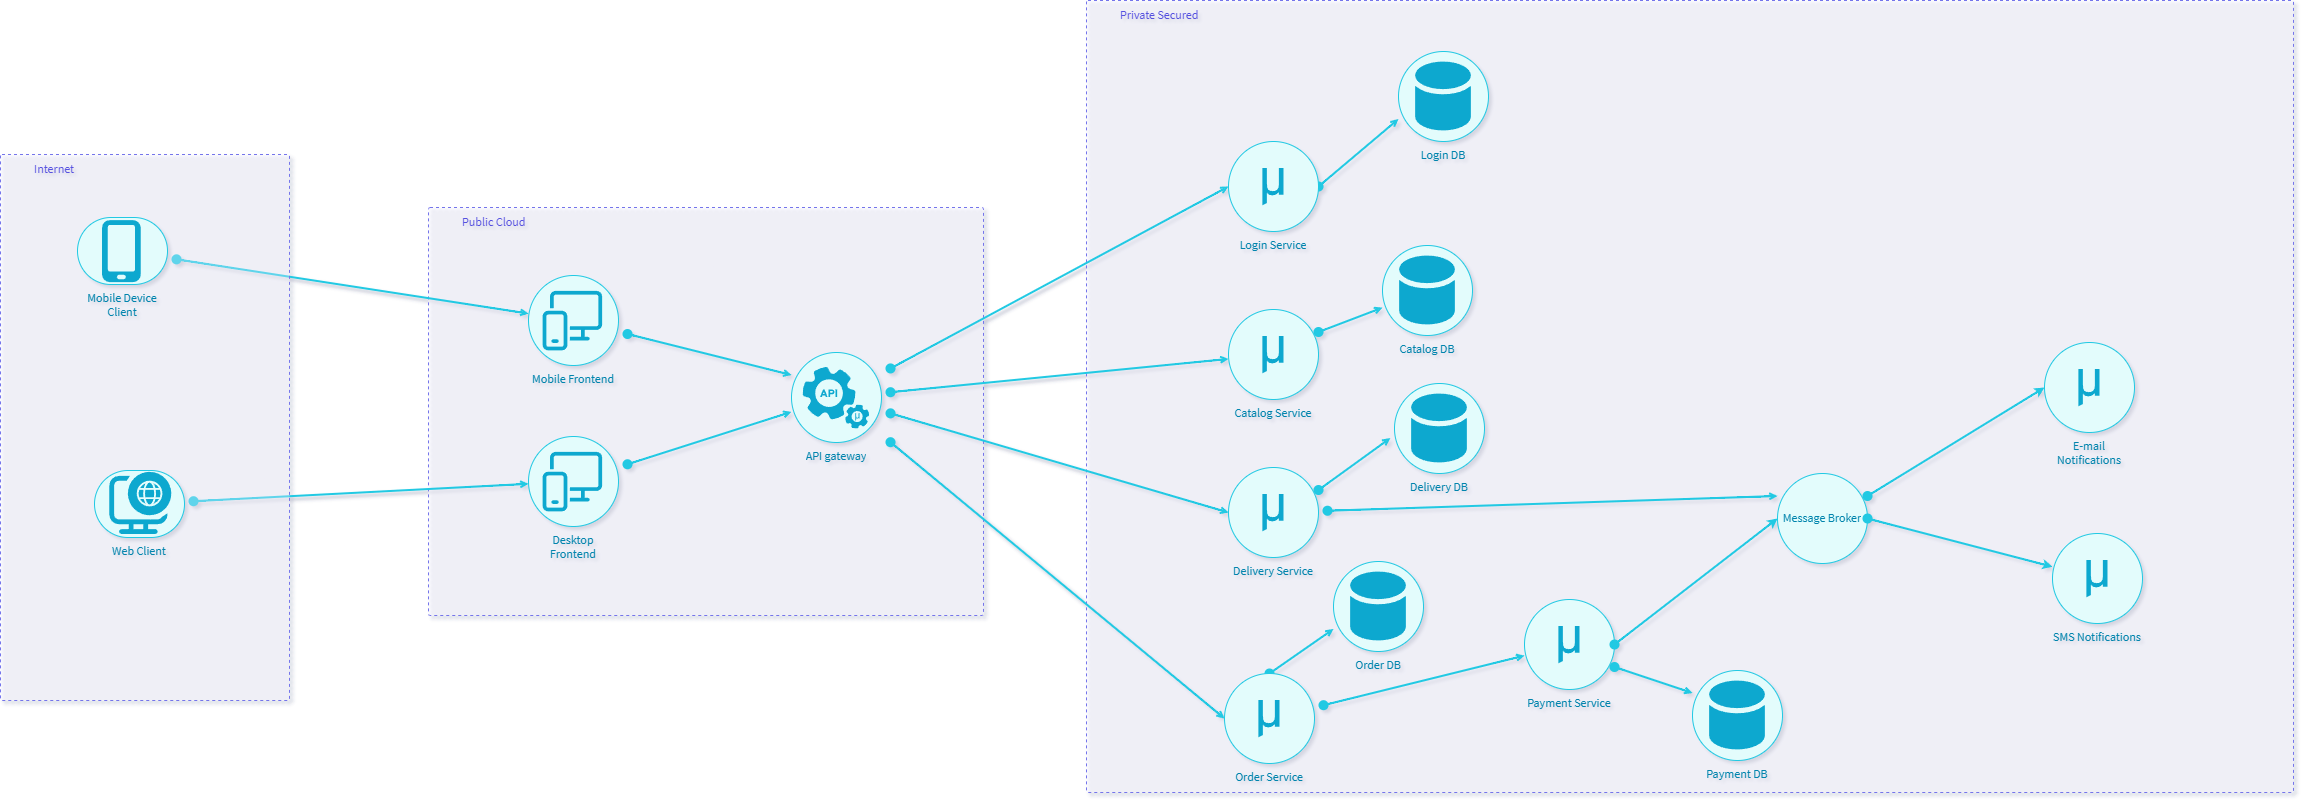

Z tych danych wynika że:
- bazy danych należały do grupy o najmniejszej liczbie zagrożeń.
    - może to być przyczyną tego, że żądania innych jednostek nie są bezpośrednio przetwarzane przez bazy danych
    - bezpieczeństwo bazy danych zależy od implementacji serwisu
    - bezpieczeństwo bazy danych zależy szyfrowania komunikacji z serwisem
- Serwisy należały do grupy z największą liczbą zagrożeń:
    - (delivery, catalog, order, login) z API gateway komunikują się protokołem HTTP, co zwiększa wektor ataku
    - w większościach przypadków (4) przetwarzają ruch zewnętrzny
    - serwisy przetwarzajace ruch wewnętrzny miały taką samą ilość wykrytych zagrożeń co serwisy zewnętrzne, mimo różnic protokołów (payment, notifications, delivery komunikują się protokołem AMQP)
- w API Gateway wykryto najmniejszą ilość zagrożeń, mimo największej liczby połączeń z serwisami

# Threats in components

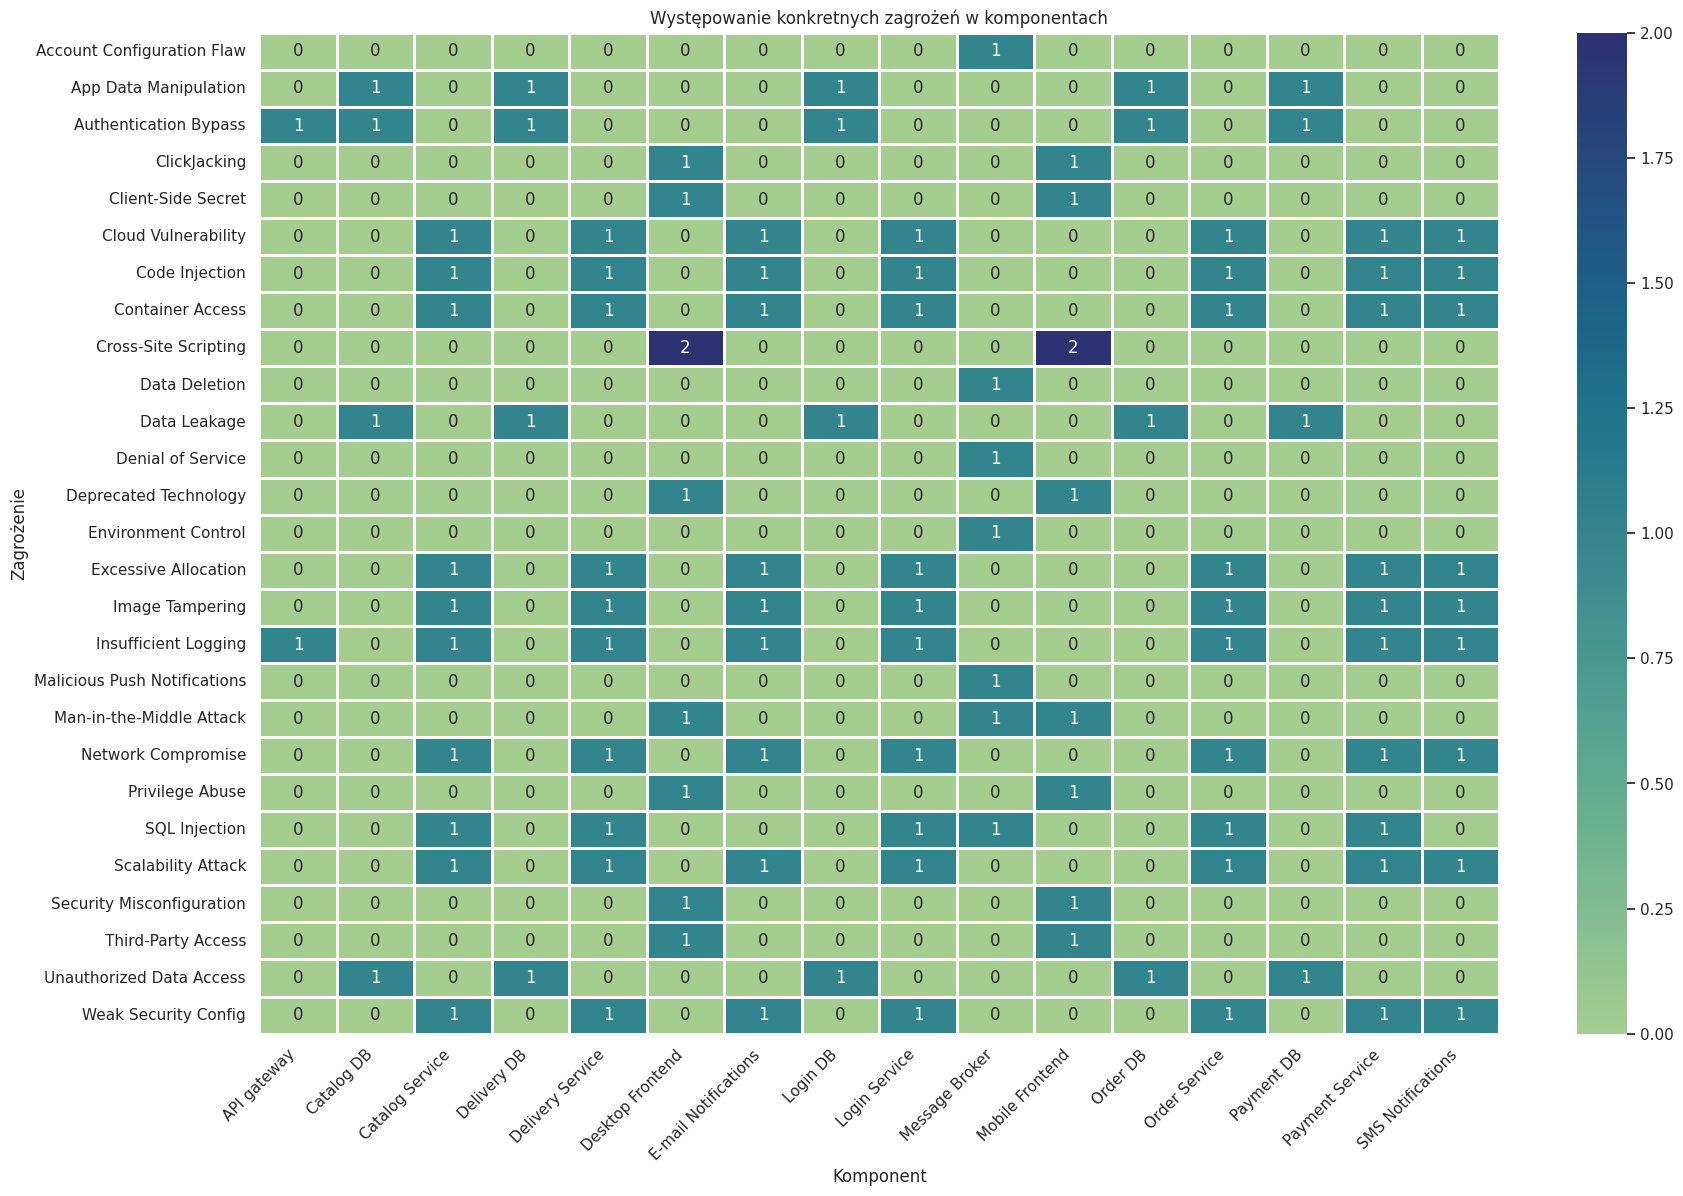

In [185]:

heatmap_data = df.groupby(['Threat abbv', 'Component']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 13))
sns.heatmap(heatmap_data, annot=True, fmt="d",linewidths=1, cmap="crest")
plt.title('Występowanie konkretnych zagrożeń w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()

### Analiza trafności wykrytych zagrożeń
- Malicious Push Notifications - N/A - występuje tylko w jednym komponencie (Message Queue), nie dotyczy go w żadnym stopniu.
- Cloud Vulnerabilities - zasadne tylko przy założeniu, że komponent korzysta z serwisów chmurowych.
- Clickjacking - może wystąpić przy założeniu, że w stronie da się osadzić zewnętrzne skrypty JS.
- Cross-Site Scripting - występuje w serwisach frond-end dwa razy - narzędzie wykryło zagrożenie podwójnie, ponieważ korzystało z dwóch różnych zbiorów referencji + zagrożenie zostało dodane do dwóch kategorii:
    - Read or Post Data (referencje: Mitre ATT&CK Technique T1189,CWE-79: Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting'),CWE-693-NOSNIFF: Internet Explorer could allow Cross Site Scripting attacks through content sniffing,CWE-84-HTTP-ONLY: Lack of 'HttpOnly' flag on session cookie,CAPEC-63)
    - General (referencje: Mitre ATT&CK Technique T1189,CWE-20: Input to exported activities, intents or content providers is not validated,CAPEC-63)




# STRIDE Categories in Components

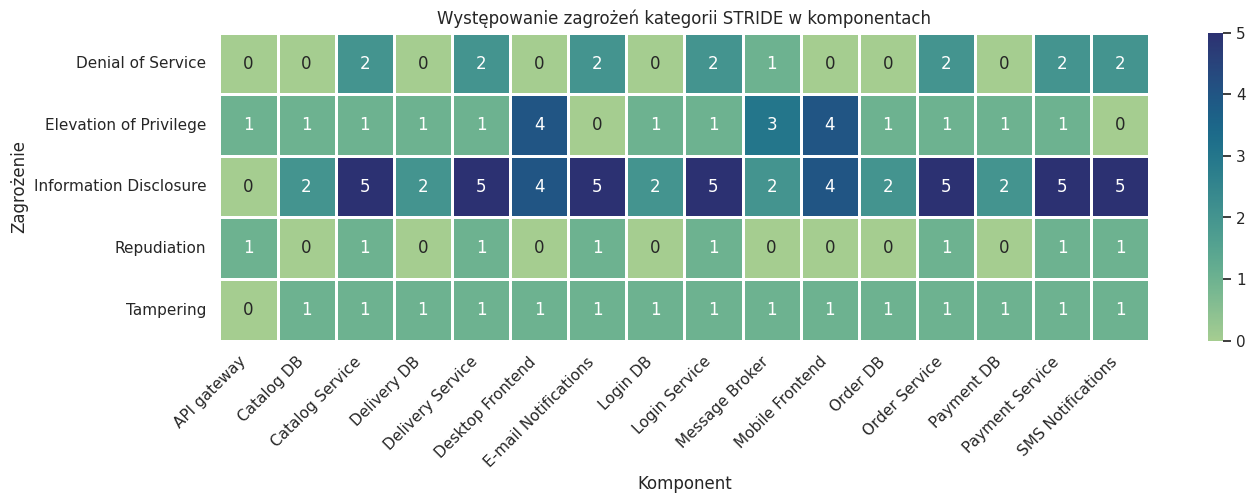

In [186]:
component_category_heatmap = df.groupby(['STRIDE Category','Component']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 4))
sns.heatmap(component_category_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Występowanie zagrożeń kategorii STRIDE w komponentach')
plt.xlabel('Komponent')
plt.ylabel('Zagrożenie')
plt.xticks(rotation=45,ha="right")
plt.show()


# # Count occurrences of each combination of STRIDE Category and Component
# threat_counts = df.groupby(['STRIDE Category', 'Component']).size().reset_index(name='Counts')

# # Set seaborn style
# sns.set(style="whitegrid")

# # Create the bar chart
# plt.figure(figsize=(12, 8))
# bar_plot = sns.barplot(x='Counts', y='Component', hue='STRIDE Category', data=threat_counts, palette='pastel')

# # Add title and labels
# plt.title('Threat Counts by STRIDE Category and Component')
# plt.xlabel('Counts')
# plt.ylabel('Component')

# # Display the plot
# plt.show()



### Obserwacje
- Information Disclosure występuje najwięcej razy w komponentach serwisów i front-end. + występuje we wszystkich komponentach oprócz API Gateway.
- Elevation of Privilege występuje najwięcej razy (5) we Front-endach i Message Brokerze(1) (MQ).
- Denial of Service występuje najczęściej we wszystkich serwisach + raz w MQ.
- Repudiation występuje we wszystkich komponentach oprócz baz danych i serwisów Front-End.
- Tampering występuje we wszystkich serwisach back-endowych i w bazach danych.
- Spoofing nie występuje w żadnym z komponentów
### Wnioski
Najbardziej rozpowszechnioną kategorią zagrożeń w mikroserwisie (według narzędzia) jest "Information Disclosure". Kategoria skupia się na ujawnianiu informacji niepożądanym podmiotom. Można stwierdzić, że system według narzędzia IriusRisk jest najbardziej narażony na różnego rodzaju wykradnięcie danych poprzez na przykład:



In [187]:
import plotly.graph_objects as go

nodes = list(df['Component'].unique()) + list(df['STRIDE Category'].unique()) + list(df['Threat abbv'].unique())

# Define links
links = []
for i, row in df.iterrows():
    links.append({
        'source': row['Component'],
        'target': row['STRIDE Category'],
        'value': 1
    })
    links.append({
        'source': row['STRIDE Category'],
        'target': row['Threat abbv'],
        'value': 1
    })

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=['blue']*len(df['Component'].unique()) + ['green']*len(df['STRIDE Category'].unique()) + ['red']*len(df['Threat abbv'].unique())
    ),
    link=dict(
        source=[nodes.index(link['source']) for link in links],
        target=[nodes.index(link['target']) for link in links],
        value=[link['value'] for link in links],
    )
)])

# Update layout
fig.update_layout(title_text="Relationship Between Threats, STRIDE Categories, and Components", height=1200)

# Show plot
fig.show()

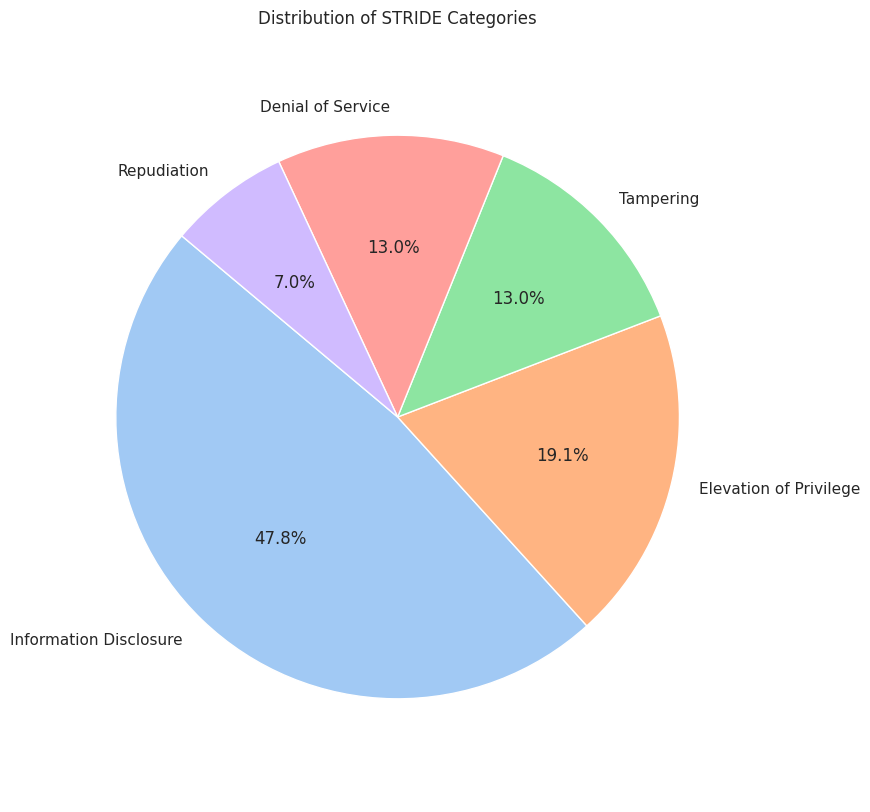

In [188]:
df[['STRIDE Category','Component']]

stride_counts = df['STRIDE Category'].value_counts()

# Set seaborn style
sns.set(style="whitegrid")

# Create the pie chart using matplotlib
plt.figure(figsize=(8, 10))
colors = sns.color_palette('pastel')[0:len(stride_counts)]
plt.pie(stride_counts, labels=stride_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of STRIDE Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

### Podsumowanie
#### Information Disclosure
Z największą częstotliwością w kategorii STRIDE pojawia się "Information Disclosure" w serwisach (48%).<br>
Jest to obszar bezpieczeństwa który według narzędzia jest najbardziej zagrożony.

Architektura według IriusRisk jest narażona najbardziej na zagrożenia takie jak:
- A. Niedostateczna lub niewłaściwa konfiguracja bezpieczeństwa komponentów (Weak Security Config,Security Misconfiguration)
- B. Dostęp do wrażliwych danych/zasobów (Client-Side Secret, Third-Party Access, Data Leakage, Container Access, Unauthorized Data Access)
- C. Dostęp do komunikacji osób trzecich (Man in the Middle, Network Compromise)
- D. Ujawnienie danych za pomocą Code Injection (Code Injection)
- E. Podatności chmurowe (Cloud Vulnerability)

#### Elevation of Privilege
Aplikacja posiada 19.1% zagrożeń z kategorii STRIDE "Elevation of Privilege".<br>
Do kategorii "Elevation of Privilege" zaliczają się zagrożenia:
- F. SQL Injection (SQL Injection)
- G. Cross-Site Scripting (Cross-Site Scripting)
- H. Przestarzała technologia użyta w aplikacji (Deprecated Technology)
- I. Nadużycie uprawnień (Privilege Abuse, Authentication bypass)
- J. Kontrola nad środowiskiem aplikacyjnym (Environmental Control)
- K. Błąd konfiguracji kont użytkownika/admina (Account Configuration Flaw)

#### Denial of Service
Kategoria Denial of Service należy do 13% wszystkich wykrytych naruszeń kategorii STRIDE.<br>
W skład tej kategorii wchodzą zagrożenia:
- L. Scalability Attack (np. DDoS)
- M. Excessive Allocation (nadmierna alokacja zasobów)

### Tampering 
- N. (container) Image Tampering - nieuprawniona edycja obrazu kontenera
- O. App Data Manipulation - manipulacja danych aplikacji
- P. Data Deletion - nieuprawnione usunięcie danych
- R. Clickjacking

### Repudiation
(7%)
- S. Niedostateczny monitoring/logging zdarzeń (Insufficient logging)
### Spoofing
- brak zagrożeń związanych ze spoofingiem


### Wnioski/weryfikacja
Information Disclosure:
- ad A. Konfiguracja bezpieczeństwa jest zależna od wewnętrznych czynników i specyfiki kodu aplikacji (która nie została jasno określona na poziomie threat-modelingu)
- ad B. dostęp do wrażliwych zasobów może być spowodowany:
    - niewłaściwą konfiguracją aplikacji
    - podatnościami konkretnych technologii w aplikacji
    - brakiem szyfrowania
- ad C. Man-in-the-Middle może być konsekwencją:
    - nieszyfrowanego ruchu HTTP (lub innego protokołu)
    - pozyskania wrażliwych danych (klucza publicznego i prywatnego) pozwalającego odszyfrować podsłuchiwany ruch
    - nieuprawnionego dostępu atakującego do infrastruktury
- ad D. Code injection może być wykorzystane w przypadku, gdy aplikacja nie wprowadza praktyk bezpiecznej walidacji danych wejściowych, więc wystąpienie zagrożenia jest zależne od implementacji.
- ad E. Podatności chmurowe są tylko i wyłącznie zależne od platformy chmurowej w której osadzone są wszystkie komponenty.

Elevation of Privilege:
- ad F. wykonanie SQL injection jest zależne od implementacji sanityzacji i walidacji danych wejściowych (ad D.)
- ad G. Cross-Site Scripting w serwisach front-end jest zależne od implementacji Front-Endu oraz walidacji (ad D.) oraz może być powiązane z ujawnieniem wrażliwych danych w kodzie HTML lub w danych przeglądarki (np. tokeny sesji, ID użytkownika, produktu itp.)
- ad H. Przestarzałe technologie mogą posiadać podatności zarówno po stronie klienta (front-end) oraz po stronie serwera (API, backend), które mogą prowadzić do ujawnienia wrażliwych danych (ad. B) i przez to doprowadzić do podniesienia uprawnień
- ad I. Nadużycie uprawnień jest powiązane z zagrożeniami Information Disclosure(ad A-E) i skutkuje:
    - podniesieniem uprawnień innych użytkowników (Elevation of Privilege)
    - dostępem do wrażliwych danych
- ad J. Występuje w momencie uzyskania kontroli atakującego nad konkretnym systemem jako skutek:
    - wykorzystania podatności
    - niewłaściwej kontroli dostępu/autoryzacji/uwierzytelnienia
    - pozyskania wrażliwych danych aplikacji
- ad K. Błędna konfiguracja kont jest bezpośrednio powiązana z zagrożeniem A

Denial of Service:
- ad L. Występuje, gdy aplikacja nie posiada właściwego sposobu obrony przed atakami wolumetrycznymi
- ad M. Występuje przy niewłaściwej konfiguracji skalowania systemu (brak ograniczeń skalowalności kontenerów/maszyn wirtualnych ad A.)
Tampering:
- ad N. Nieuprawniona edycja obrazów kontenerów może wystąpić tylko, gdy atakujący ma dostęp do edycji repozytorium kontenerów. Do takiej sytuacji może dojść w sytuacji gdy:
    - atakujący ma wysokie uprawnienia (zdobył uprawnienia wykorzystując zagrożenia z kategorii Information Disclosure)
    - repozytorium kontenerów nie jest zabezpieczone poprawnie (działania na repozytorium powinny być chronione kontrolą dostępu/autoryzacją i uwierzytelnieniem)
- ad O. Nieuprawniona manipulacja danych aplikacji może być skutkiem:
    <!-- - niewłaściwej konfiguracji aplikacji (ad A.) -->
    - ujawnienia niepożądanych danych przez zagrożenia Information Disclosure(ad A-E)
    - Ataków typu Cross-Site Scripting
    - innych podatności


Podczas tworzenia aplikacji mikroserwisowej, powinno się szczególnie zwrócić uwagę na poprawną konfigurację całego środowiska. Zagrożenia kategorii "Information Disclosure" mają katastrofalne konsekwencje w momencie wystąpienia incydentu, ponieważ one najczęściej otwierają najwięcej możliwości wystąpienia innych ataków.

In [189]:


# # Define a unique color for each threat abbreviation using a more distinct palette
# unique_threats = df['Threat abbv'].unique()
# palette = sns.color_palette('tab20', len(unique_threats))
# color_mapping = dict(zip(unique_threats, palette))

# # Plotting the data
# plt.figure(figsize=(14, 10))
# chart = sns.countplot(data=df, y='STRIDE Category', hue='Threat abbv', palette=color_mapping, dodge=False)
# chart.set_title('STRIDE Categories and Corresponding Threat Descriptions (Abbreviated)')
# chart.set_xlabel('Count')
# chart.set_ylabel('STRIDE Category')

# # Adjust the legend
# plt.legend(title='Threat Abbreviation', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

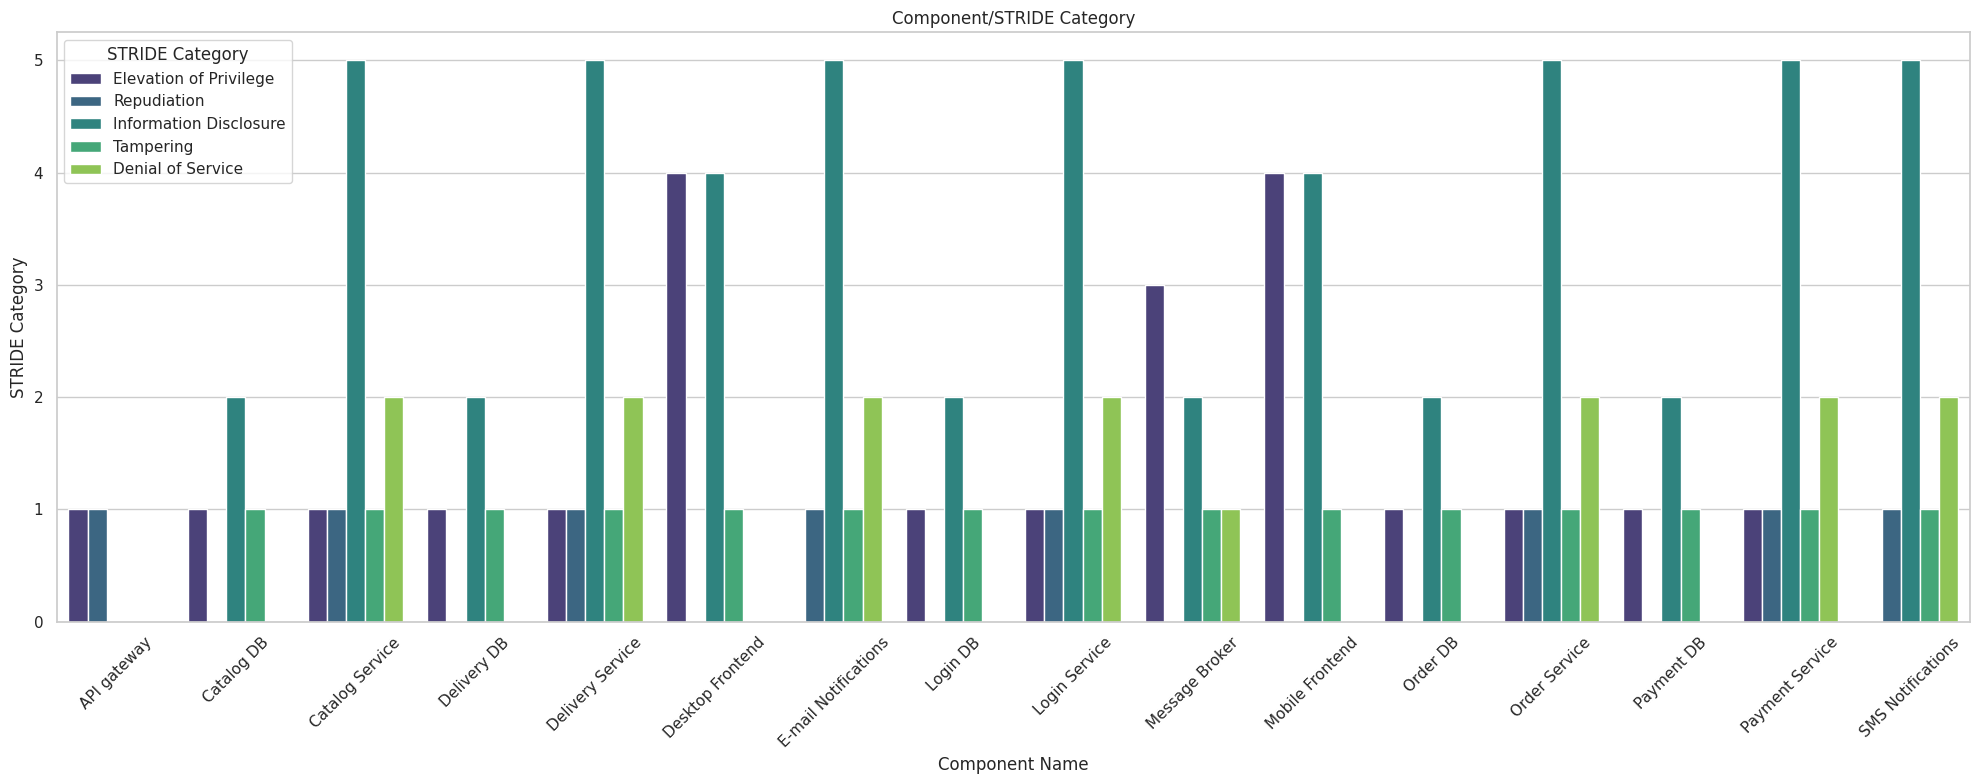

In [190]:
component_category_counts = df.groupby(['Component','STRIDE Category']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='Component', y='Count', hue='STRIDE Category', data=component_category_counts, palette='viridis')
plt.title('Component/STRIDE Category')
plt.xlabel('Component Name')
plt.ylabel('STRIDE Category')
plt.xticks(rotation=45)
plt.legend(title='STRIDE Category')
plt.tight_layout()
plt.show()

# Threats in use cases

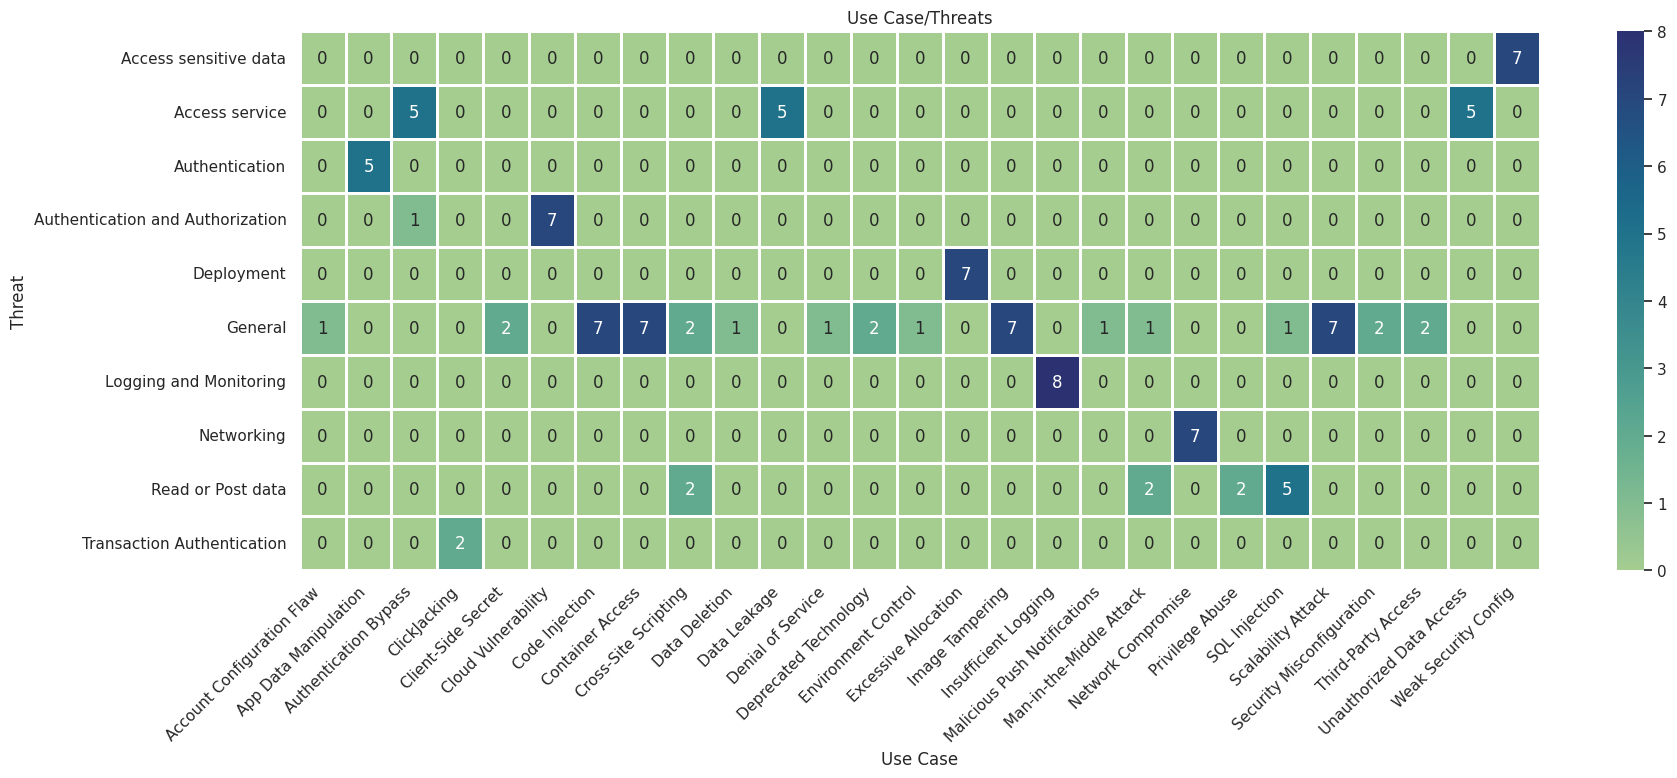

In [191]:
usecase_threat_heatmap = df.groupby(['Use Case','Threat abbv']).size().unstack(fill_value=0)
plt.figure(figsize=(20,7))
sns.heatmap(usecase_threat_heatmap, annot=True,linewidth=1,cmap="crest")
plt.title('Use Case/Threats')
plt.xlabel('Use Case')
plt.ylabel('Threat')
plt.xticks(rotation=45,ha="right")
plt.show()